In [1]:
import os, sklearn, pandas, numpy as np
from sklearn import svm
import skimage, skimage.io, skimage.filters
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import skimage.io

In [3]:
## NN libs
from keras import backend as K
from sklearn.decomposition import PCA
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [4]:
# custom scripts
import config # params, constants
import data # functions that mutate outr data
from utils import utils, plot # custom functions, in local environment

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'labels' = pandas.df('img_name','breed')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


# Prepare dataset

In [5]:
# labels = pandas.read_csv('../datasets/labels.csv')
# dataset = data.Dataset(config.dataset_dir, label_name='breed')

# train_list is just a list of image names, not te actual data
# dataset = namedtuple('Dataset',['train','test','labels'])
dataset = data.init_dataset()
labels = dataset.labels
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,84bcd47e09b0ef3f0b6e3f47f232a77c,scottish_deerhound
freq,1,126


In [6]:
shape = (300,300,3)
def crop(img):
    return img[0:300,0:300]

def flatten(img):
    img = crop(img)
    return img.flatten()

In [7]:
def extract_all_data(dataset, img_list, reshaper=crop, verbose=False):
    print('extract all data:', len(img_list))
    x_train = []
    y_train = []
    for img_name in img_list:
        img = data.read_img('train/',img_name,verbose)
        img = reshaper(img)
        x_train.append(img)
        y_train.append(data.get_label(img_name, dataset.labels))
    return (x_train,y_train)

In [8]:
# Read data
x_train, y_train = extract_all_data(dataset, dataset.train[0:200])
print(len(x_train))
print(len(y_train))

extract all data: 200
200
200


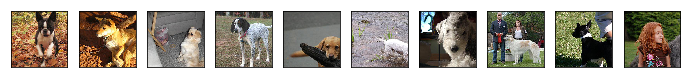

In [10]:
plot.multiple(x_train[:10])

In [ ]:
# Use full structure or flatten image?

# PCA to reduce dimensions